In [1]:
import numpy as np
train_data = np.load('train_data.npy')
train_label= np.load('train_label.npy')

test_data = np.load('test_data.npy')
test_label = np.load('test_label.npy')

print(len(test_data))
print(len(test_label))

print(train_data.shape)
print(test_label.shape)

320
320
(1280, 784, 500)
(320, 2)


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the model's architecture
model = tf.keras.models.Sequential([
    # Add a convolutional layer with 16 filters and a kernel size of 3x3
    tf.keras.layers.Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),

    # Add a max pooling layer with a pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),

    # Add a dropout layer with a rate of 0.5
    tf.keras.layers.Dropout(0.5),

    # Add a dense layer with 16 units and ReLU activation
    tf.keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'),

    # Add a dropout layer with a rate of 0.5
    tf.keras.layers.Dropout(0.5),

    # Add a dense output layer with 2 units and sigmoid activation
    tf.keras.layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [3]:
train_data = train_data.reshape(train_data.shape[0], 784, 500, 1)
history = model.fit(
    train_data, 
    train_label, 
    epochs = 30,
    batch_size = 30,
) 

Epoch 1/30
43/43 [==============================] - 6s 66ms/step - loss: 1.1698 - accuracy: 0.5148
Epoch 2/30
43/43 [==============================] - 3s 59ms/step - loss: 0.8279 - accuracy: 0.6578
Epoch 3/30
43/43 [==============================] - 3s 62ms/step - loss: 0.6991 - accuracy: 0.7352
Epoch 4/30
43/43 [==============================] - 3s 59ms/step - loss: 0.6665 - accuracy: 0.7852
Epoch 5/30
43/43 [==============================] - 3s 61ms/step - loss: 0.6879 - accuracy: 0.8203
Epoch 6/30
43/43 [==============================] - 3s 64ms/step - loss: 0.6967 - accuracy: 0.8570
Epoch 7/30
43/43 [==============================] - 3s 58ms/step - loss: 0.6397 - accuracy: 0.9016
Epoch 8/30
43/43 [==============================] - 3s 59ms/step - loss: 0.6870 - accuracy: 0.9031
Epoch 9/30
43/43 [==============================] - 2s 58ms/step - loss: 0.8641 - accuracy: 0.8719
Epoch 10/30
43/43 [==============================] - 3s 58ms/step - loss: 0.7699 - accuracy: 0.9359
Epoch 11/

In [4]:
model.save('saved_model_cnn')
model.summary()

INFO:tensorflow:Assets written to: saved_model_cnn\assets


INFO:tensorflow:Assets written to: saved_model_cnn\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 782, 498, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 391, 249, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1557744)           0         
                                                                 
 dropout (Dropout)           (None, 1557744)           0         
                                                                 
 dense (Dense)               (None, 16)                24923920  
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

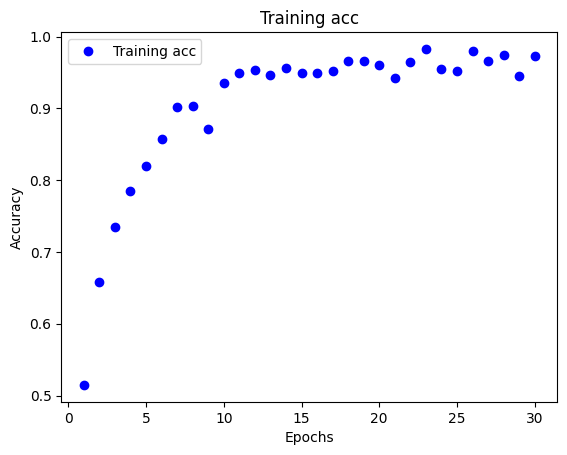

22


In [5]:
history_dict = history.history
history_dict.keys() # the data gathered during training
import matplotlib.pyplot as plt
def plot_acc():
    plt.clf()
    acc = history_dict['accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.title('Training acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_acc()
early_stopping_epoch = np.argmax(history.history["accuracy"])
print(early_stopping_epoch)

In [6]:
tf.keras.backend.clear_session()
new_model = tf.keras.models.load_model('saved_model_cnn')

In [7]:
new_model.fit(
    train_data,                     # full training set
    train_label,
    epochs=early_stopping_epoch, # the epoch where overfitting starts
    batch_size=30
)
new_model.save('saved_model_cnn')

Epoch 1/22
43/43 [==============================] - 4s 69ms/step - loss: 0.4828 - accuracy: 0.9641
Epoch 2/22
43/43 [==============================] - 3s 70ms/step - loss: 0.5098 - accuracy: 0.9594
Epoch 3/22
43/43 [==============================] - 3s 67ms/step - loss: 0.5733 - accuracy: 0.9641
Epoch 4/22
43/43 [==============================] - 3s 61ms/step - loss: 0.5849 - accuracy: 0.9656
Epoch 5/22
43/43 [==============================] - 3s 61ms/step - loss: 0.4795 - accuracy: 0.9781
Epoch 6/22
43/43 [==============================] - 3s 61ms/step - loss: 0.5711 - accuracy: 0.9695
Epoch 7/22
43/43 [==============================] - 3s 61ms/step - loss: 0.5704 - accuracy: 0.9656
Epoch 8/22
43/43 [==============================] - 3s 60ms/step - loss: 0.5835 - accuracy: 0.9602
Epoch 9/22
43/43 [==============================] - 3s 61ms/step - loss: 0.5024 - accuracy: 0.9797
Epoch 10/22
43/43 [==============================] - 3s 60ms/step - loss: 0.5393 - accuracy: 0.9781
Epoch 11/

INFO:tensorflow:Assets written to: saved_model_cnn\assets


INFO:tensorflow:Assets written to: saved_model_cnn\assets


In [10]:
final_model = tf.keras.models.load_model('saved_model_cnn')
score, acc = final_model.evaluate(test_data, test_label, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

10/10 - 7s - loss: 1.2871 - accuracy: 0.6687 - 7s/epoch - 663ms/step
Test score: 1.2870519161224365
Test accuracy: 0.668749988079071
